# `"Pump sensor data"`
## Probelma di Clustering, Dimensionality Reduction e Anomaly Detection

## DESCRIZIONE
I dati provengono dalla sensoristica collegata ad un pompa d'acqua che coinvoiglia l'acqua da una piccola regione ad una grande città. Nell'ultimo anno si sono verificati 7 malfunzionamenti che causano ingenti disagi alla popolazione. I sensori disponibili sono 52 e le informazioni presenti nel database non sono state pre-elaborate. Il campionamento è effettuato una volta al minuto (1/60 Hz).

> URL: [kaggle.com](https://www.kaggle.com/nphantawee/pump-sensor-data) 

## Importazione del dataset

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

In [0]:
df = pd.read_csv('pump_sensor.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
Unnamed: 0        220320 non-null int64
timestamp         220320 non-null object
sensor_00         210112 non-null float64
sensor_01         219951 non-null float64
sensor_02         220301 non-null float64
sensor_03         220301 non-null float64
sensor_04         220301 non-null float64
sensor_05         220301 non-null float64
sensor_06         215522 non-null float64
sensor_07         214869 non-null float64
sensor_08         215213 non-null float64
sensor_09         215725 non-null float64
sensor_10         220301 non-null float64
sensor_11         220301 non-null float64
sensor_12         220301 non-null float64
sensor_13         220301 non-null float64
sensor_14         220299 non-null float64
sensor_15         0 non-null float64
sensor_16         220289 non-null float64
sensor_17         220274 non-null float64
sensor_18         220274 non-null float64
sensor_19      

In [5]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [6]:
df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,220301.000000,220301.000000,220301.000000,220299.000000,0.0,220289.000000,220274.000000,220274.000000,220304.000000,220304.000000,220304.000000,220279.000000,220304.000000,220304.000000,220284.000000,220300.000000,220304.000000,220304.000000,220248.000000,220059.000000,220304.00000,220252.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,41.918319,29.136975,7.078858,376.860041,NaN,416.472892,421.127517,2.303785,590.829775,360.805165,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,863.32310,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,13.056425,10.113935,6.901755,113.206382,NaN,126.072642,129.156175,0.765883,199.345820,101.974118,226.679317,154.528337,291.835280,182.297979,220.865166,246.663608,169.823173,313.074032,225.764091,195.726872,283.54476,260.602361,150.751836,88.376065,141.772519,289.385511,37.604883,10.540397,15.613723,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.95833,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,38.856420,28.686810,1.538516,418.103250,NaN,459.453400,454.138825,2.447542,662.768975,398.021500,875.464400,478.962600,950.922400,601.151050,693.957800,790.489575,448.297950,782.682625,518.947225,627.777800,839.06240,760.607475,489.761075,172.486300,353.176625,288.547575,28.799220,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,45.363140,32.515830,2.929809,420.106200,NaN,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.855900,981.925000,625.873500,740.203500,861.869600,494.468450,967.279850,564.872500,668.981400,917.70830,878.850750,512.271750,226.356050,473.349350,709.668050,64.295485,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160

## Preparazione del dataset

In [0]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

In [9]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## Analisi dei dati mancanti

In [0]:
df_nan_stats = pd.DataFrame()

for col in df.columns:
    tmp = {'feature': col, 
           'unique_values': df[col].nunique(), 
           'missing_values': sum(df[col].isna()), 
           'valid_values': sum(df[col].notna()), 
           'perc_missing':sum(df[col].isna())/len(df)}
    df_nan_stats = pd.concat([df_nan_stats, pd.DataFrame(tmp, index=[0])], axis=0, ignore_index=True)

df_nan_stats.set_index('feature', inplace=True)
df_nan_stats.sort_values(by='perc_missing', ascending=False, inplace=True)

In [11]:
df_nan_stats

,unique_values,missing_values,valid_values,perc_missing
feature,,,,
sensor_15,0,220320,0,1.000000
sensor_50,1135,77017,143303,0.349569
sensor_51,1108,15383,204937,0.069821
sensor_00,1253,10208,210112,0.046333
sensor_07,531,5451,214869,0.024741
sensor_08,626,5107,215213,0.023180
sensor_06,812,4798,215522,0.021777
sensor_09,565,4595,215725,0.020856
sensor_01,831,369,219951,0.001675


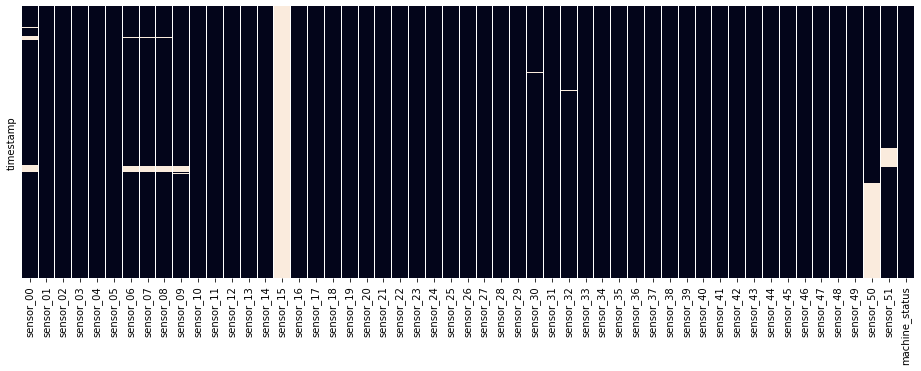

In [12]:
plt.figure(figsize=(16, 5))
sns.heatmap(data=df.isna(), yticklabels=False,cbar=False)
plt.show()

**Sembra esserci una correlazione tra i dati mancanti dei diversi sensori**

### Sensore 15

**Il sensore 15 non ha riportato alcun valore**

In [0]:
df.drop(columns=['sensor_15'], inplace = True)

### Sensore 50

**Per il sensore 50 manca circa il 35% dei dati, meglio eliminare tale variabile**

In [0]:
df.drop(columns=['sensor_50'], inplace=True)

## Analisi coerenza serie temporale

In [15]:
# Create a temporal sequence (freq=minute) form min available date to the maximum one
min_max_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='1min')
min_max_dates

DatetimeIndex(['2018-04-01 00:00:00', '2018-04-01 00:01:00',
               '2018-04-01 00:02:00', '2018-04-01 00:03:00',
               '2018-04-01 00:04:00', '2018-04-01 00:05:00',
               '2018-04-01 00:06:00', '2018-04-01 00:07:00',
               '2018-04-01 00:08:00', '2018-04-01 00:09:00',
               ...
               '2018-08-31 23:50:00', '2018-08-31 23:51:00',
               '2018-08-31 23:52:00', '2018-08-31 23:53:00',
               '2018-08-31 23:54:00', '2018-08-31 23:55:00',
               '2018-08-31 23:56:00', '2018-08-31 23:57:00',
               '2018-08-31 23:58:00', '2018-08-31 23:59:00'],
              dtype='datetime64[ns]', length=220320, freq='T')

In [16]:
# Check if the dataset contains all possible intervals
len(df.index), len(min_max_dates)

(220320, 220320)

**Il campionamento è completo!**

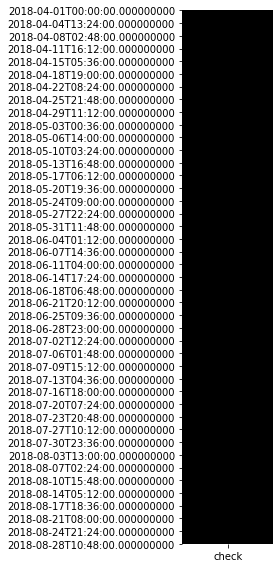

In [17]:
# True if the date in the dataset is in the [min_date, max_date] database
min_max_check = pd.DataFrame(min_max_dates.isin(df.index), index=min_max_dates, columns=['check'])

plt.figure(figsize=(4, 8))
# Heat map with usual bar palette swapped
ax = sns.heatmap(min_max_check, annot=False, cmap=['k', 'w'], cbar=False)
plt.tight_layout()
plt.show()

## Analisi univariata e multivariata

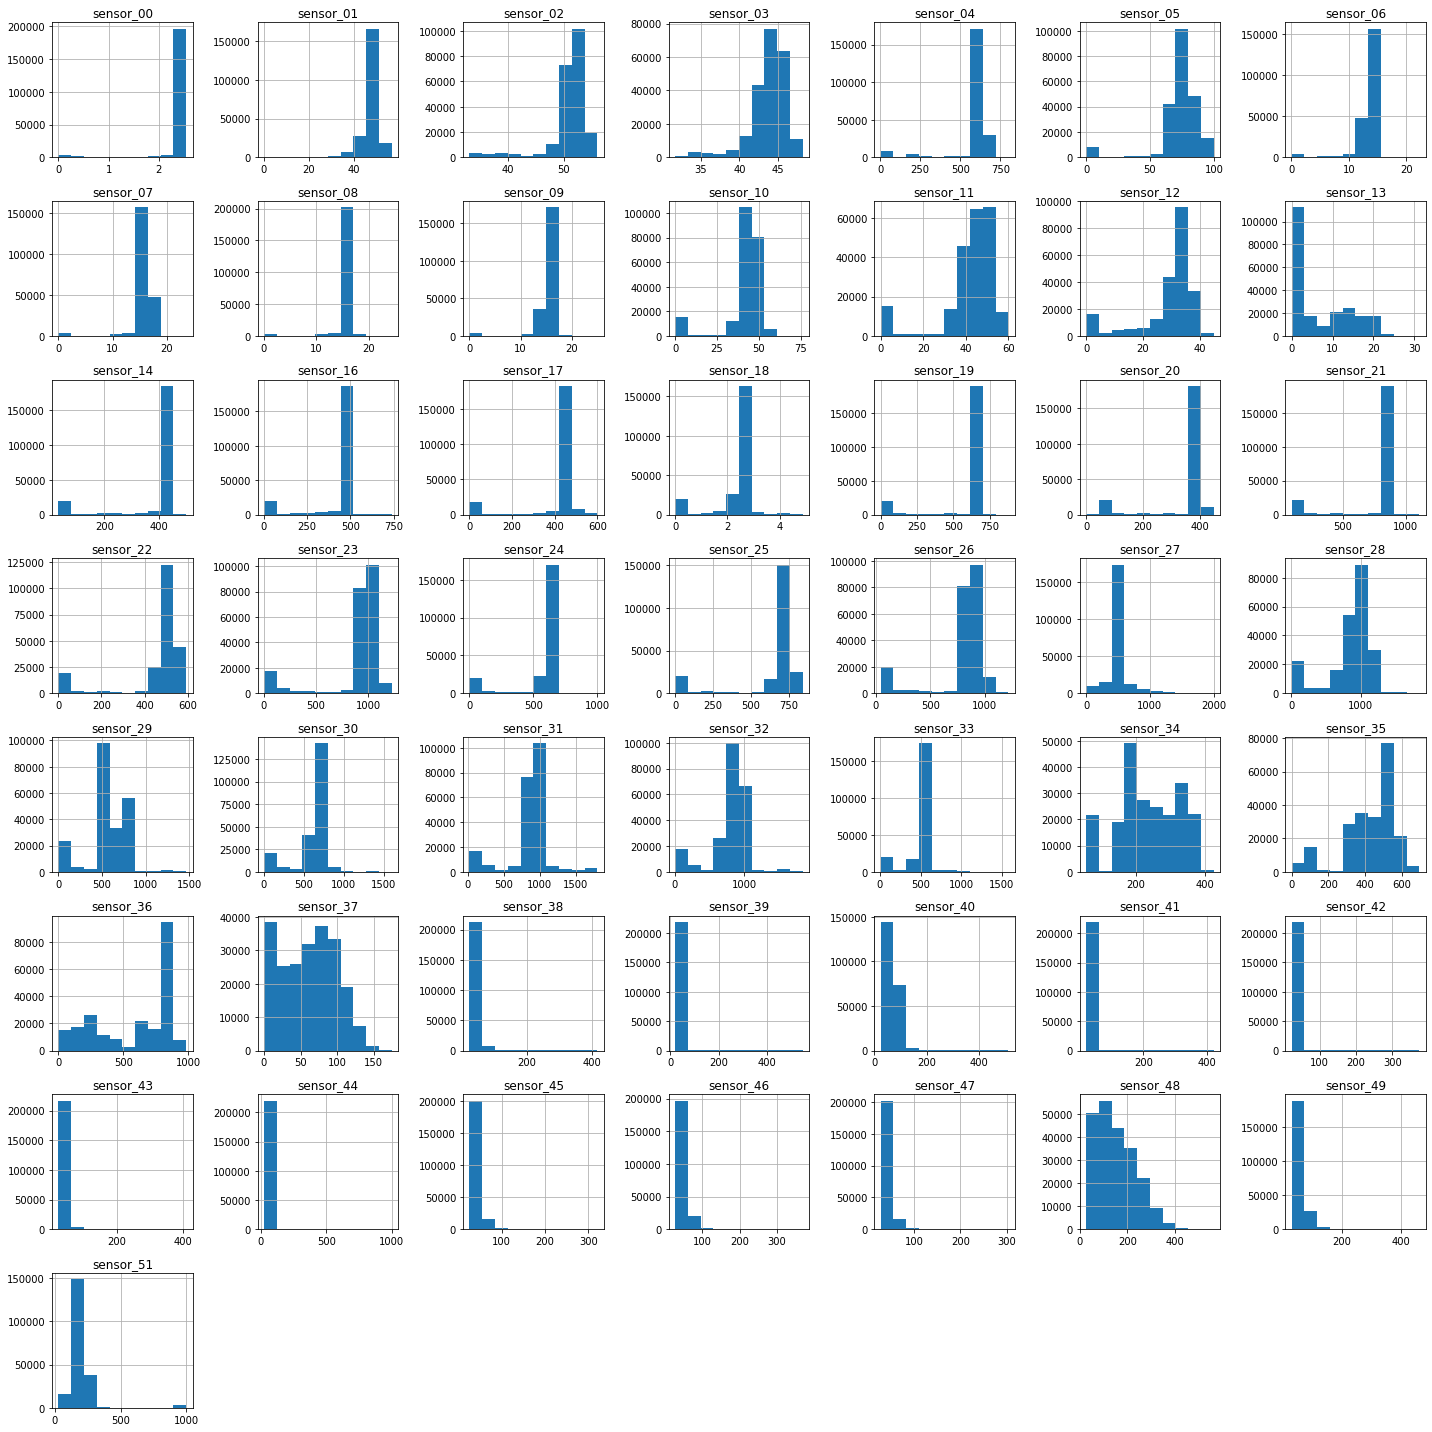

In [18]:
df.hist(figsize = (20,20))
plt.tight_layout()
plt.show()

### Stato della macchina

In [19]:
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

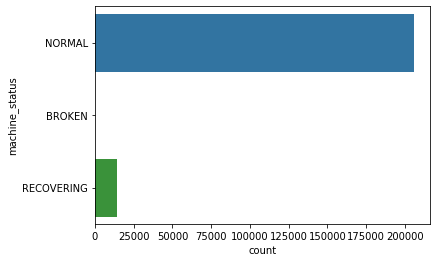

In [20]:
sns.countplot(y = df['machine_status'])

### Analisi serie temporale

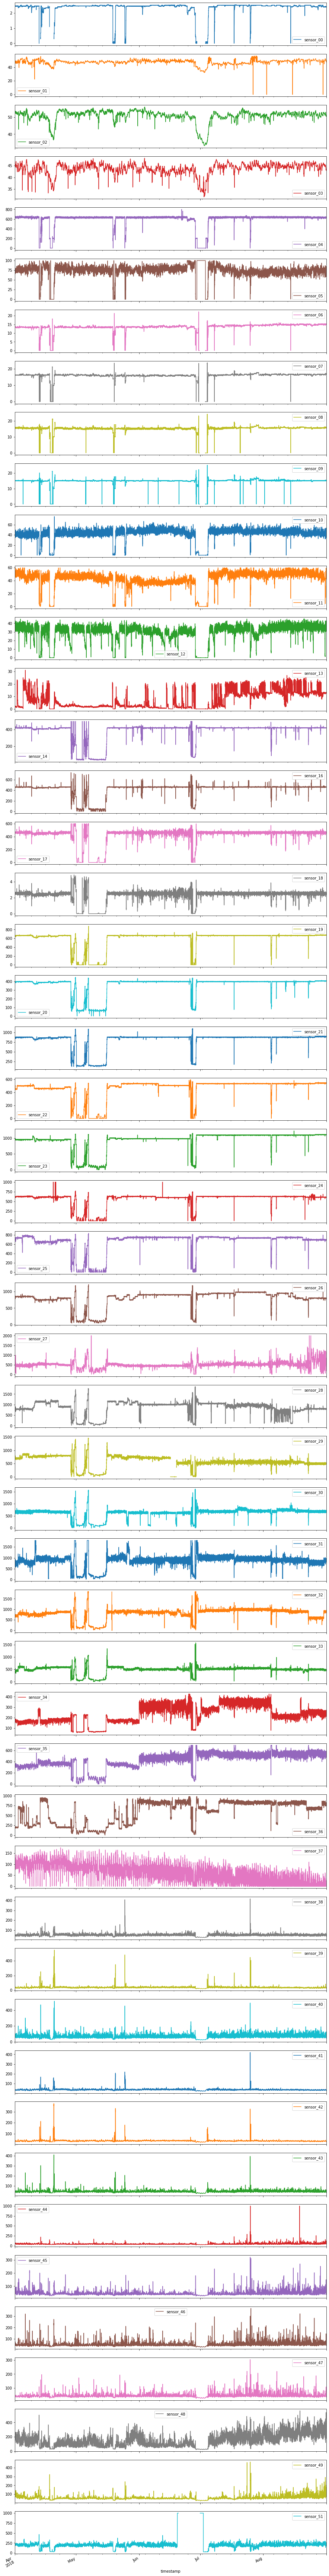

In [0]:
df.plot(figsize=(15,140), subplots=True)
plt.show()

In [0]:
# Identify the windows where the sampling is absent
recov_periods = []

start = None
stop = None

for i in range(1, len(df)-1):
    cond0 = df['machine_status'].iloc[i - 1] != 'RECOVERING'
    cond1 = df['machine_status'].iloc[i] == 'RECOVERING'
    cond2 = df['machine_status'].iloc[i + 1] != 'RECOVERING'
    if cond0 & (cond1 | (i == 1)):
        start = df.iloc[i].name

    if cond1 & (cond2 | (i+1 == len(df))):
        stop = df.iloc[i].name

    if (start is not None) & (stop is not None):
        # Store beginning and ending of the recovering period
        recov_periods.append([start, stop])

        start = None
        stop = None

In [0]:
recov_periods

[[Timestamp('2018-04-12 21:56:00'), Timestamp('2018-04-13 13:39:00')],
 [Timestamp('2018-04-18 00:31:00'), Timestamp('2018-04-20 04:20:00')],
 [Timestamp('2018-05-19 03:19:00'), Timestamp('2018-05-20 01:10:00')],
 [Timestamp('2018-05-25 00:31:00'), Timestamp('2018-05-25 10:35:00')],
 [Timestamp('2018-06-28 22:01:00'), Timestamp('2018-07-04 17:50:00')],
 [Timestamp('2018-07-08 00:12:00'), Timestamp('2018-07-08 00:52:00')],
 [Timestamp('2018-07-25 14:01:00'), Timestamp('2018-07-25 15:15:00')]]

**Proprio come il numero dei guasti!**

In [0]:
for col in df.drop(columns='machine_status').columns.tolist():
    # Plot the feature trend
    plt.figure(figsize=(15, 4))
    ax = sns.lineplot(data=df[col], lw=.8)
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    plt.title(f'{col} during the obs. period')

    # Draw line when the pump is broken 
    ax.vlines(x=df.loc[df.machine_status == 'BROKEN'].index.tolist(), 
              ymin=ax.get_ylim()[0], 
              ymax=ax.get_ylim()[1],
              lw=4,
              ls='--',
              alpha=0.7,
              color='crimson')
    
    # Draw recovering periods
    for recov in recov_periods:
        ax.axvspan(date2num(recov[0]), date2num(recov[1]), alpha=0.7, color='orange')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Matrice di correlazione

**Correlazione di Pearson**

$$corr(X, Y) = \frac{cov(X, Y)}{\sqrt{var(X) var(Y)}}$$
dove
$$cov(X, Y) = \mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]$$

> Se $X$ e $Y$ sono indipendenti allora $cov(X, Y) = 0$ e $corr(X, Y) = 0$.

Si può dimostrare questa proprietà considerando che due variabili aleatorie si dicono indipendenti quando 
$$\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$$

*   Il coefficiente di correlazione è simmetrico: $corr(X, Y) = corr(Y, X)$
*   $corr(X, X) = 1$
*   Il coefficiente di correlazione è compreso tra -1 e 1; per tali valori si raggiunge rispettivamente il grado massimo di correlazione negativa e positiva
*   Se $|corr(X, Y)|=1$ allora vi è una dipendenza lineare tra $X$ e $Y$

**Per un campione**
$$r_{XY}=\frac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{N} (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{N} (y_i - \bar{y})^2}}$$

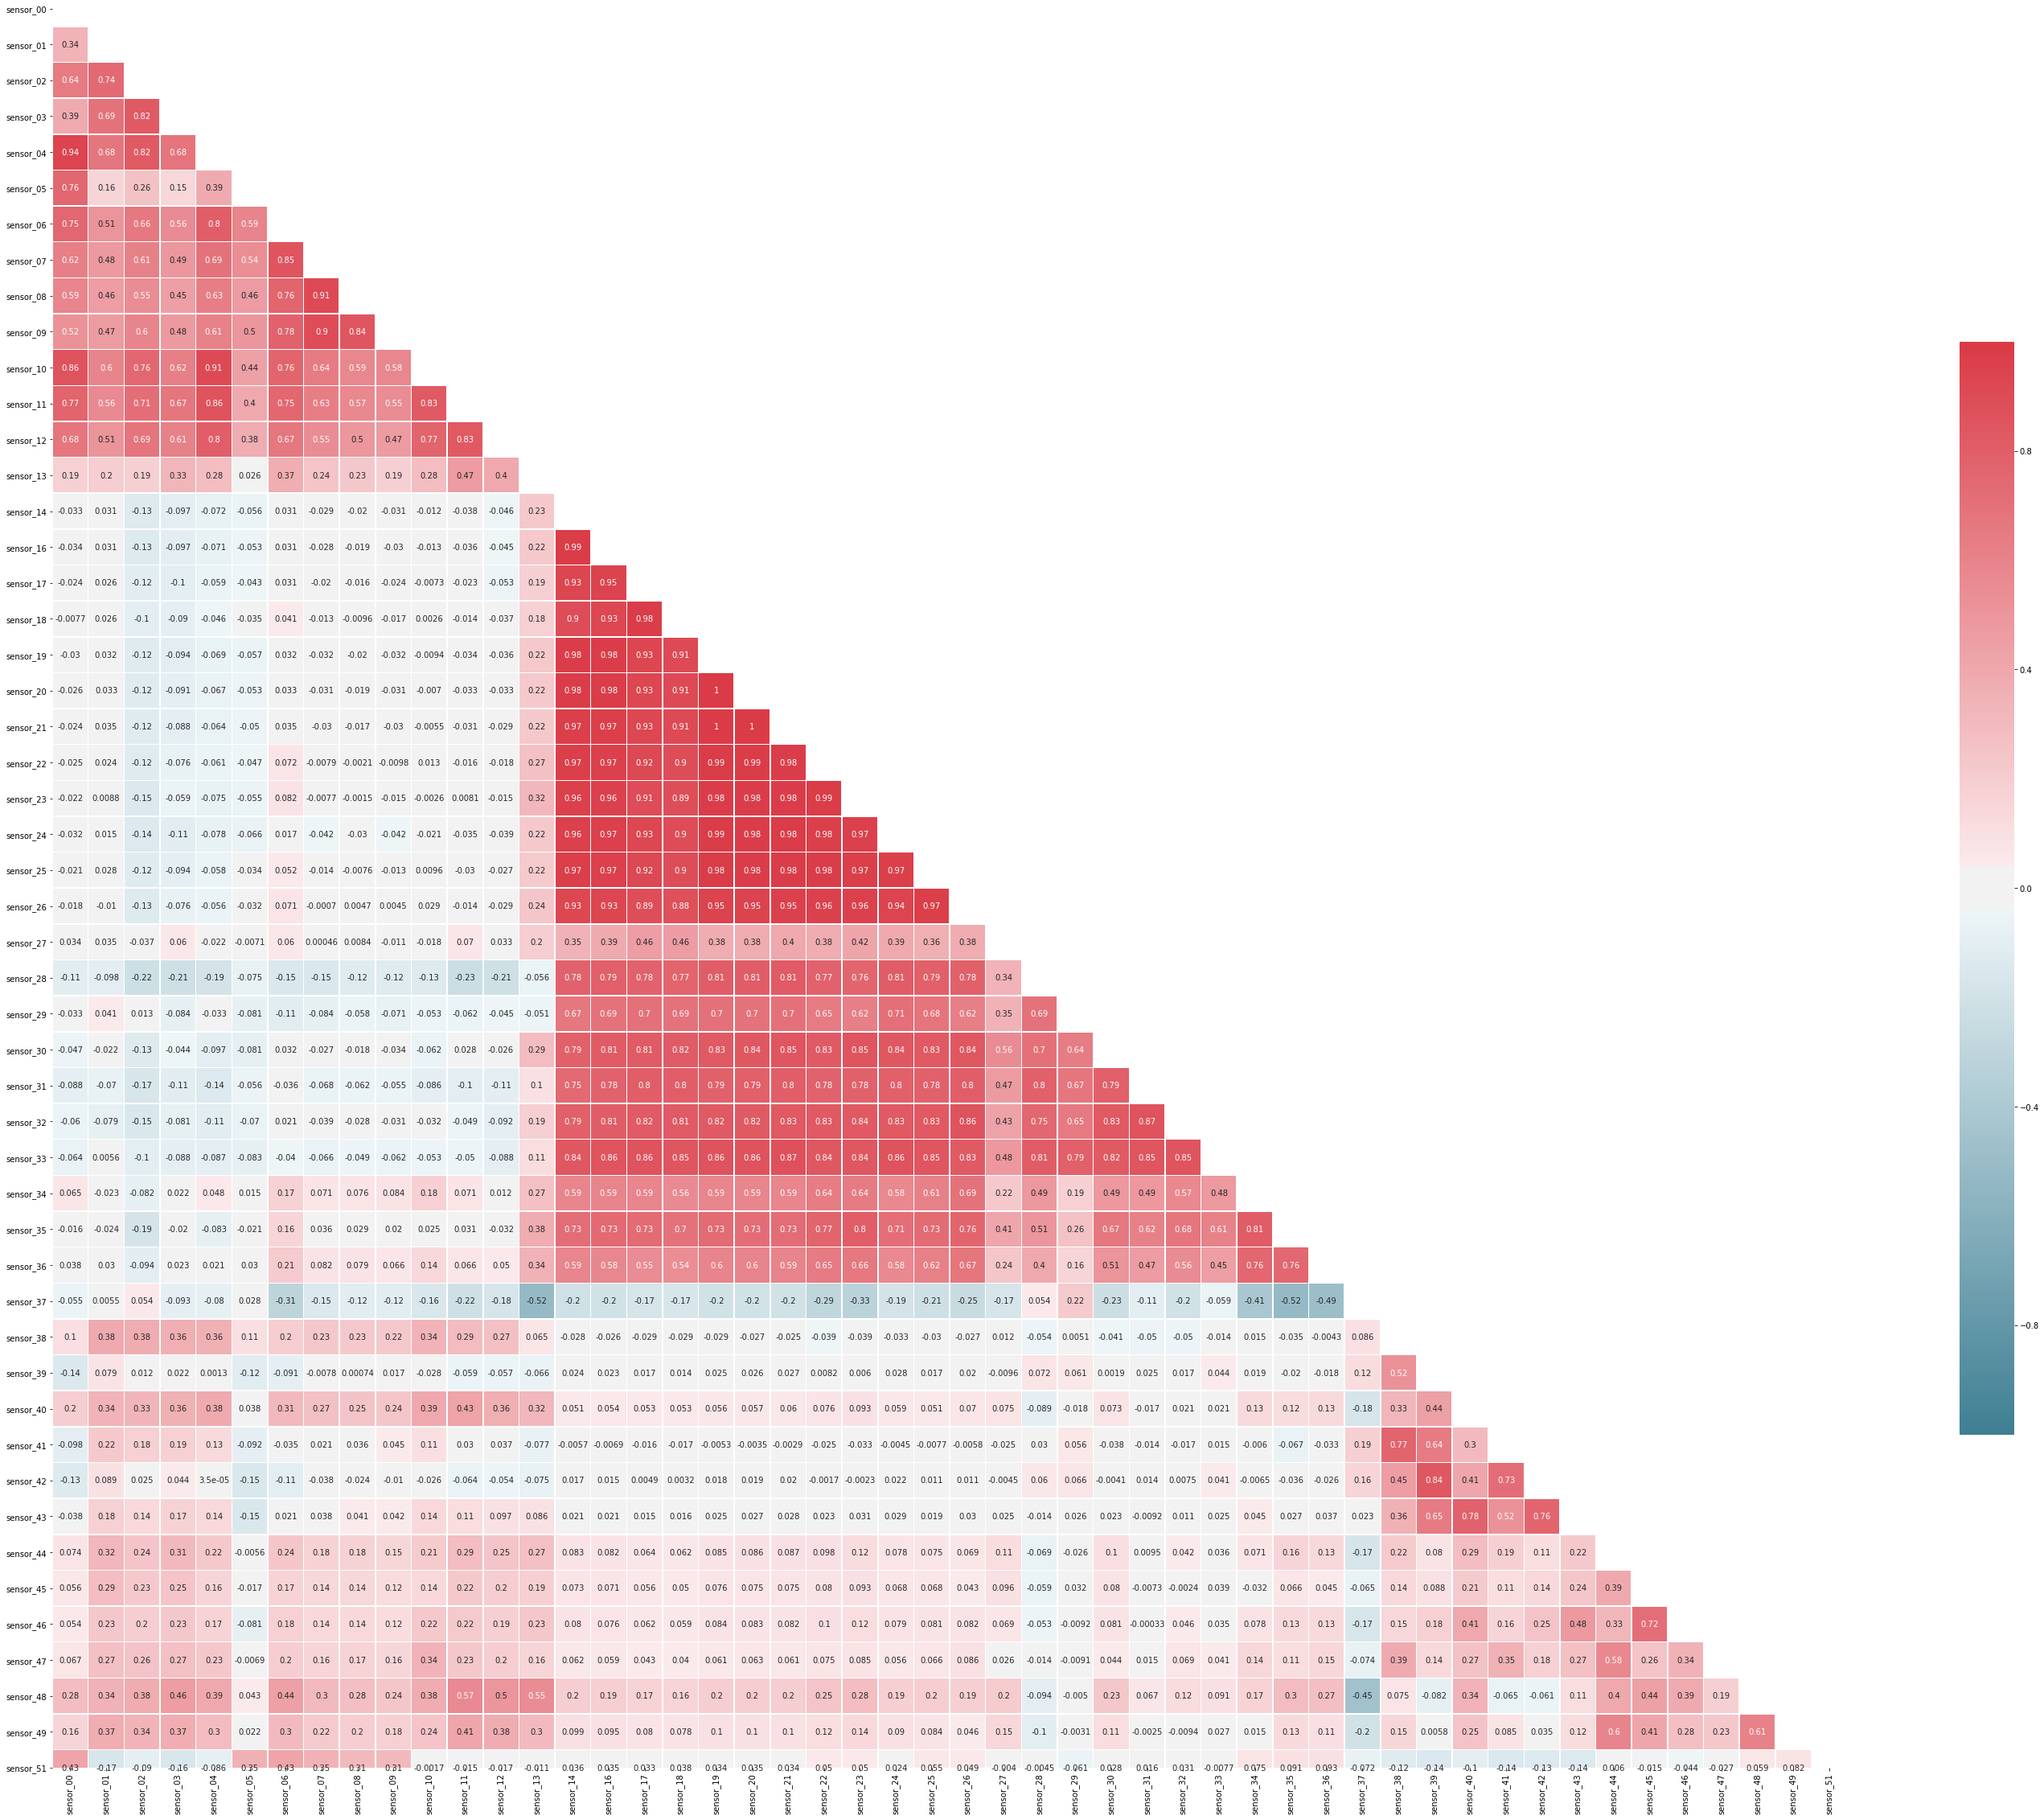

In [21]:
corr = df.drop(columns='machine_status').corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmin=-1, 
            vmax=1, 
            annot=True,
            center=0,
            square=True,
            linewidths=.5, 
            cbar_kws={"shrink": .5})

plt.show()

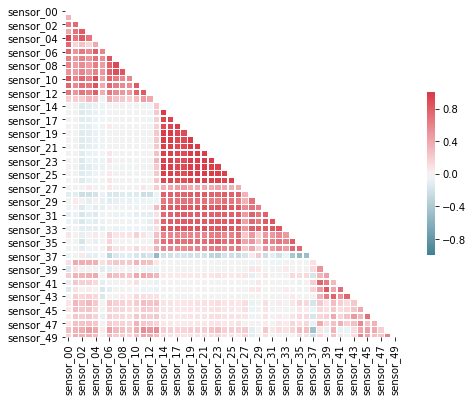

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmin=-1, 
            vmax=1, 
            annot=False,
            center=0,
            square=True,
            linewidths=.5, 
            cbar_kws={"shrink": .5})
plt.show()

**I sensori 00 -:- 11 sono tra loro fortemente correlati**

**I sensori 14 -:- 36 sono tra loro correlati**

## Completamento dei dati mancanti
> **Poiché non stiamo sviluppando un modello predittivo autoregressivo potremmo anche permetterci di eliminare alcuni datapoints con informazioni mancanti**

> **ATTENZIONE**\
**Valutare sempre se la mancanza di alcune informazioni non è causale!**\
Ad esempio poco prima che un componente si rompa il sensore smette di inviare segnali oppure il sensore non invia informazioni in quanto è sotto manutenzione



**Occorre quindi scartare tutte le informazioni mancanti relative al periodo di rottura o riparazione della pompa**

In [0]:
mask = (df.machine_status != 'NORMAL') & (df.isnull().any(axis=1))

df.drop(index=df[mask].index, inplace=True)

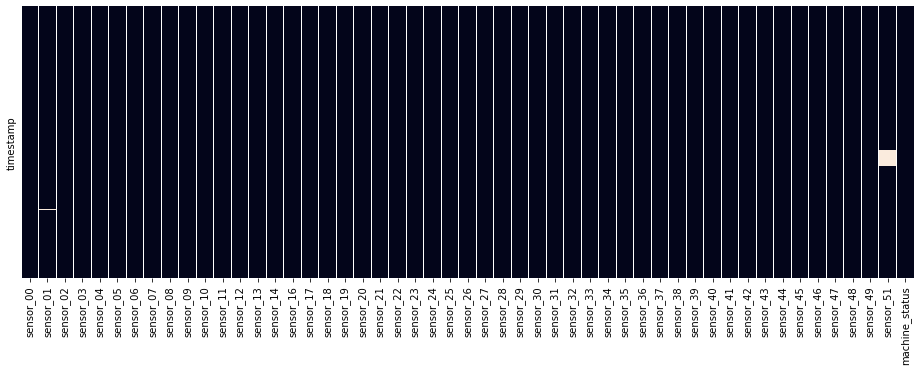

In [24]:
plt.figure(figsize=(16, 5))
sns.heatmap(data=df.isna(), yticklabels=False,cbar=False)
plt.show()

In [0]:
df_nan_stats = pd.DataFrame()

for col in df.columns:
    tmp = {'feature': col, 
           'unique_values': df[col].nunique(), 
           'missing_values': sum(df[col].isna()), 
           'valid_values': sum(df[col].notna()), 
           'perc_missing':sum(df[col].isna())/len(df)}
    df_nan_stats = pd.concat([df_nan_stats, pd.DataFrame(tmp, index=[0])], axis=0, ignore_index=True)

df_nan_stats.set_index('feature', inplace=True)
df_nan_stats.sort_values(by='perc_missing', ascending=False, inplace=True)

In [26]:
df_nan_stats

,unique_values,missing_values,valid_values,perc_missing
feature,,,,
sensor_51,1085,12384,196498,0.059287
sensor_01,703,339,208543,0.001623
sensor_30,2013,261,208621,0.001250
sensor_29,191536,72,208810,0.000345
sensor_32,194919,68,208814,0.000326
sensor_18,145585,46,208836,0.000220
sensor_17,141360,46,208836,0.000220
sensor_22,122012,41,208841,0.000196
sensor_25,156510,36,208846,0.000172


> **ATTENZIONE**\
**Mai interpretare la correlazione come causalità e quindi completare dati mancanti di una variabile utilizzando quelle delle altre disponibili!**\
Mai sviluppare algoritmi di classificazione o di regressione che permettano di costruire un algoritmo di imputing per una variabile esplicativa sulla base delle altre



### Media aritmetica

Dove c'è solo un dato mancante ma è presente quello precedente $\mathbf{x}_{t-1}$ e successivo $\mathbf{x}_{t+1}$ allora si può completare $\mathbf{x}_{t}$ con
$$\mathbf{x}_{t} = \frac{\mathbf{x}_{t+1} + \mathbf{x}_{t-1}}{2}$$

> **APPROCCIO DIFFICILMENTE APPLICABILE IN EVENTUALE PRODUZIONE**

In [0]:
def historical_imputation(data, columns=None):
    if columns == None:
        columns = data.columns.tolist()

    data_nan = data.isnull()
    count = {col: 0 for col in columns}

    for col in columns:
        count = 0
        for i in range(1, len(data) - 1):
            cond0 = data_nan[col].iloc[i - 1] == False
            cond1 = data_nan[col].iloc[i] == True
            cond2 = data_nan[col].iloc[i + 1] == False
            if cond0 & cond1 & cond2:
                data[col].iloc[i] = (data[col].iloc[i - 1] + data[col].iloc[i + 1]) / 2.0
                count += 1
        print(f'Column: {col:s}\t\tMissing values imputed: {count:d}')

    return data

In [28]:
df = historical_imputation(df)

Column: sensor_00		Missing values imputed: 0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Column: sensor_01		Missing values imputed: 1
Column: sensor_02		Missing values imputed: 0
Column: sensor_03		Missing values imputed: 0
Column: sensor_04		Missing values imputed: 0
Column: sensor_05		Missing values imputed: 0
Column: sensor_06		Missing values imputed: 0
Column: sensor_07		Missing values imputed: 0
Column: sensor_08		Missing values imputed: 0
Column: sensor_09		Missing values imputed: 0
Column: sensor_10		Missing values imputed: 0
Column: sensor_11		Missing values imputed: 0
Column: sensor_12		Missing values imputed: 0
Column: sensor_13		Missing values imputed: 0
Column: sensor_14		Missing values imputed: 5
Column: sensor_16		Missing values imputed: 5
Column: sensor_17		Missing values imputed: 5
Column: sensor_18		Missing values imputed: 5
Column: sensor_19		Missing values imputed: 5
Column: sensor_20		Missing values imputed: 5
Column: sensor_21		Missing values imputed: 5
Column: sensor_22		Missing values imputed: 5
Column: sensor_23		Missing values imputed: 5
Column: se

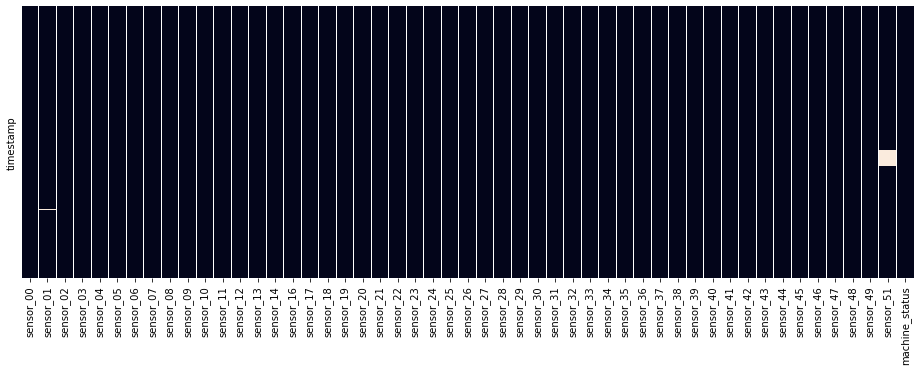

In [29]:
plt.figure(figsize=(16, 5))
sns.heatmap(data=df.isna(), yticklabels=False,cbar=False)
plt.show()

**Eliminazione dati mancanti residuali**

In [0]:
df.dropna(inplace=True)

## Dataset Setup

**Per semplicità computazionale prendiamo le prime 50000 righe**

In [0]:
X = df.drop(columns='machine_status')

y_dict = {'NORMAL': 0, 'BROKEN': 1, 'RECOVERING': 2}
y = df['machine_status'].apply(lambda x: y_dict[x])

## Dimensionality Reduction


Le tecniche di dimensionalty reduction permettono, dato un set di variabili aleatorie, di ridurne il numero pur preservando specifiche caratteristiche statistiche.

Le tecniche di dimensionalty reduction sono volte a uno dei due obiettivi:
*   **Feature selection**, in cui si scelgono solo alcune variabili aleatorie tra tutte quelle disponibili
*   **Feature extraction**, in cui si costruiscono nuove variabili aleatorie che preservano la massima quantità di informazione possibile e non sono ridondanti





Le tecniche di feature selection si basano generalmente su proprietà statistiche, come la varianza, o relative alla teoria dell'informazione. \
[Qui](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) un elenco delle tecniche più usate.

Esempi di tecniche di feature extraction sono la PCA, l'algoritmo t-SNE e gli autoencoder (particolari reti neurali)

### PCA

La Principal Component Analysis (PCA) è un algoritmo di feature extraction che mira a trovare un nuovo sistema di riferimento nello spazio delle variabili aleatorie in modo da massimizzare la varianza, lungo gli assi, delle variabili rappresentate. \
Il numero delle variabili proiettate/latenti rimane inizialmente lo stesso a quello originale, ma può essere ridotto non considerando quelle che contribuiscono in minima parte alla varianza totale

Se le variabili sono indipendenti, inoltre, l’applicazione della PCA non darà alcun risultato.

La PCA può essere formulata in due modi: tramite la massimizzazione della varianza (di seguito trattata) o tramite la minimizzazione dell'errore di proiezione.



---



**PCA Maximum Variance Formulation**

Sia $\{\mathbf{x}_i\}_{i=1,\dots, N}$ l'insieme di dati disponibili e $d$ il numero di componenti di $\mathbf{X}$ (la dimensionalità del dataset). Indichiamo con 
$$\bar{\mathbf{x}} = \frac{1}{N} \sum_{i=1}^N \mathbf{x}_i$$
la media. Sia $\mathbf{u}$ il vettore unitario ($\mathbf{u}^T\mathbf{u}=1$) di proiezione, detto **componente princiaple**, che permette di passare dallo spazio a dimensionalià $d$ a uno con dimensionalità $1$, valore definito a priori.

La varianza dei punti nello spazio proiettato è pari a
$$\hat{var}_{projected} = \frac{1}{N}\sum_{i=1}^N || \mathbf{u}^T\mathbf{x}_i - \mathbf{u}^T\bar{\mathbf{x}}_i||^2 = \mathbf{u}^T \mathbf{\Sigma} \mathbf{u}$$
con $\mathbf{\Sigma}$ matrice di covarianza definita come
$$\mathbf{\Sigma} = \frac{1}{N}\sum_{i=1}^N (\mathbf{x}_i - \bar{\mathbf{x}}_i) (\mathbf{x}_i - \bar{\mathbf{x}}_i)^T = \mathbf{u}^T \mathbf{\Sigma} \mathbf{u}$$

L'algoritmo richiede quindi di massimizzare $\hat{var}_{projected}$ rispetto a $\mathbf{u}$:
$$\max_{\mathbf{u}} \mathbf{u}^T \mathbf{\Sigma} \mathbf{u}$$
Il problema di ottimizzazione è vincolato dalla condizione $\mathbf{u}^T\mathbf{u}=1$ che impedisce $||\mathbf{u}||^2 \to +\infty$. Si fa quindi uso del moltiplicatore di Lagrange $\lambda$ per ricondurre il problema di ottimizzazione ad uno di tipo libero.
$$\max_{\mathbf{u}} \left[\mathbf{u}^T \mathbf{\Sigma} \mathbf{u} + \lambda (1 - \mathbf{u}^T\mathbf{u})\right]$$

Ponendo a zero le derivate rispetto a $\mathbf{u}$ e $\lambda$ si ottiene
$$\mathbf{\Sigma}\mathbf{u} = \lambda \mathbf{u}$$
che significa che $\mathbf{u}$ per essere soluzione deve essere autovalore della matrice di varianza-covarianza con autovalore $\lambda$. Per ottenere tale soluzione basta diagonalizzare la matrice $\mathbf{\Sigma}$.

Da notare che sfruttando la condizione $\mathbf{u}^T\mathbf{u}=1$ si ottiene che la varianza proiettata è pari all'autovalore:
$$\mathbf{u}^T \mathbf{\Sigma} \mathbf{u} = \lambda$$
La soluzione per massimizzare la varianza proiettata è quindi quella di scegliere l'autovettore a cui corrisponde l'autovalore più elevato.

> Si può ripetere un procedimento con tante componenti principali quante le $\kappa$ dimensionalità dello spazio ridotto che si vuole ottenere. Per fare ciò basta considerare i $\kappa$ autovalori più grandi e ricavare quindi i relativi autovettori.

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
%%time
# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

# Principal Component Analysis
pca = PCA(n_components=2)
X_pca_reduced = pca.fit_transform(X_scaled)

CPU times: user 2.38 s, sys: 1.39 s, total: 3.76 s
Wall time: 2.05 s


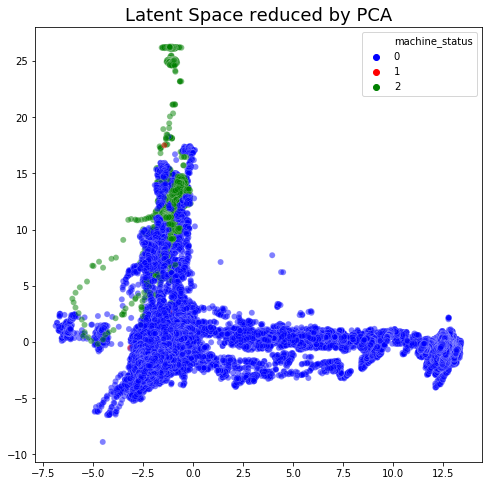

In [45]:
# Visualize results
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca_reduced[:,0], 
                y=X_pca_reduced[:,1], 
                hue=y.loc[X.dropna().index],
                palette=['blue', 'red', 'green'],
                linewidth=.2,
                alpha=0.5)
plt.title('Latent Space reduced by PCA', fontsize=18)
plt.show()

In [0]:
total_expl_var = {}

for n_features in range(1, len(X.columns)+1):
    pca_n = PCA(n_components=n_features)
    pca_n.fit(X_scaled)
    total_expl_var[n_features] = sum(pca_n.explained_variance_ratio_)

total_expl_var = pd.Series(total_expl_var, name='Explained Variance Ratio')

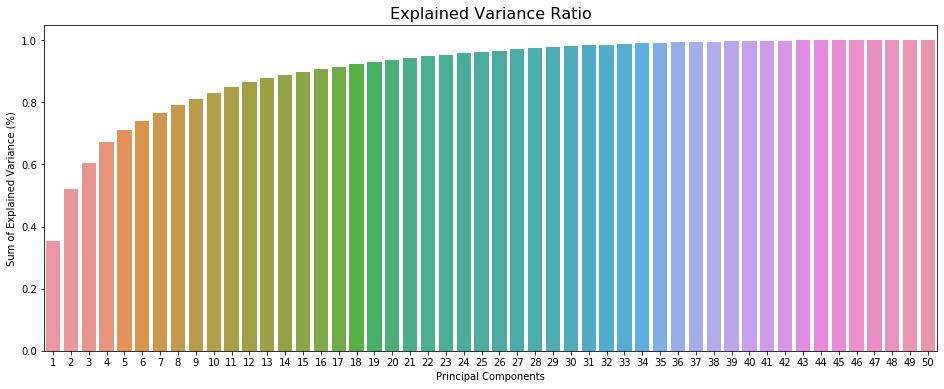

In [47]:
plt.figure(figsize=(16, 6))
sns.barplot(x=total_expl_var.index, y=total_expl_var)
plt.title('Explained Variance Ratio', fontsize=16)
plt.xlabel('Principal Components')
plt.ylabel('Sum of Explained Variance (%)')
plt.show()

### t-SNE

L'algoritmo t-SNE, acronimo di "t-distributed stochastic neighbor embedding" è un algoritmo di feature extraction ed è stato sviluppato da Geoffrey Hinton e Laurens van der Maaten nel 2008 ([paper](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)).

Si tratta di una tecnica di riduzione della dimensionalità non lineare molto efficace nella riduzione di set di variabili aleatorie ad alta dimensionalità in uno spazio a due o tre dimensioni. 

> **L'algoritmo modella i punti in modo che oggetti vicini nello spazio originale risultino vicini nello spazio a dimensionalità ridotta, e oggetti lontani risultino lontani, cercando di preservare la struttura locale**

Sia $\left\{\mathbf{x}_i\right\}_{i=1, \dots, N}$ lo spazio delle covariate osservato.\
L'algoritmo t-SNE prevede due fasi (*):

1.   Si costruisce una distribuzione di probabilità $p$ che ad ogni coppia di punti $(\mathbf{x}_i, \mathbf{x}_j)$ appartenenti allo spazio originale delle covariate $\mathcal{X}$ restituisce una probabilità: se due punti sono molto vicini la probabilità sarà alta, se lontani allora sarà bassa. 
$$p_{ij} = \frac{p_{i|j} + p_{j|i}}{2N}$$
Il termine $p_{i|j}$ rappresenta la probabilità che $\mathbf{x}_j$ scelga $\mathbf{x}_i$ come suo "vicino". Si sceglie per $p_{i|j}$ e $p_{j|i}$ una distribuzione di probabilità gaussiana
$$p_{i|j} \propto e^{- \frac{\left\lVert\mathbf{x}_i - \mathbf{x}_j\right\rVert^2}{2\sigma_j}}$$
$p_{i|i}$ è posto a zero.

2.   Scelta la dimensionalità dello spazio ridotto $\tilde{\mathcal{X}}$, l'algoritmo posiziona a caso i punti  nello spazio e ne costruisce una seconda distribuzione di probabilità $q$. \
Si sceglie per $q_{i|j}$ e $q_{j|i}$ una distribuzione di probabilità t-student
$$q_{i|j} \propto \frac{1}{\left\lVert\tilde{\mathbf{x}}_i - \tilde{\mathbf{x}}_j\right\rVert^2}$$
I punti nello spazio $\tilde{\mathcal{X}}$ sono quindi riorganizzati in modo da minimizzare la **divergenza di Kullback-Leibler**.
$$\mathcal{R}= \sum_{i=1}^{N} D_{KL}(P_i|Q_i) = \sum_i\sum_j p_{j|i} \log\left(\frac{p_{j|i}}{q_{j|i}}\right)$$


(*) Si fa uso della notazione originale utilizzata nella pubblicazione.

Se i punti $\tilde{\mathbf{x}}_i$ e $\tilde{\mathbf{x}}_j$ sono mappati correttamente rispetto alla loro versione ad alta dimensionalità, $\mathbf{x}_i$ e $\mathbf{x}_j$, allora si avrà
$$p_{j|i}=q_{j|i}.$$
Per questo motivo occorre allenare l'algoritmo affinché le due distribuzioni di probabilità siano il più possibile simili. Si utilizza perciò la divergenza KL ([pari all'opposto della log-verosimiglianza](https://wiseodd.github.io/techblog/2017/01/26/kl-mle/)). Minimizzare $D_{KL}$ significa massimizzare la log-verosimiglianza.


---

[Qui](https://www.youtube.com/watch?v=NEaUSP4YerM) un video introduttivo


Un video più tecnico: [parte 1](https://www.youtube.com/watch?v=ohQXphVSEQM) e [parte 2](https://www.youtube.com/watch?v=W-9L6v_rFIE)

---



#### Gradient Descent

Dato il problema di ottimizzazione
$$\hat{\mathbf{\theta}}= \arg \min_{\mathbf{\theta}\in\Theta} \mathcal{R}(\mathbf{\theta})$$
Condizione sufficiente affinché $\theta$ sia punto stazionario per $\mathcal{R}$ è che
$$\nabla_{\mathbf{\theta}} \mathcal{R}(\mathbf{\theta}) = 0$$
$$\nabla_{\mathbf{\theta}} \left[\frac{1}{N}\sum_{i=1}^N \mathcal{L}(f(\mathbf{x}_i; \mathbf{\theta}), \mathbf{y}_i)\right] = 0$$
$$\frac{1}{N}\sum_{i=1}^N \nabla_{\mathbf{\theta}} \mathcal{L}(f(\mathbf{x}_i; \mathbf{\theta}), \mathbf{y}_i) = 0$$
In questa formulazione la condizione è che la loss function sia nulla per ogni datapoint
$$\nabla_{\mathbf{\theta}} \mathcal{L}(f(\mathbf{x}_i; \mathbf{\theta}), \mathbf{y}_i) = 0 \quad\forall(\mathbf{x}_i;, \mathbf{y}_i)\in\mathcal{D} \Longrightarrow \nabla_{\mathbf{\theta}} \mathcal{R}(\mathbf{\theta}) = 0$$

Il calcolo del gradiente della loss function procede applicando la regola di derivazione per funzioni composte (nota come *chain rule*). Questo procedimento è noto come **back-propagation**.

L'algoritmo iterativo di **gradient descent** (GD), che mira a ricercare il minimo della risk function, si basa sulla back propagation e sulla formulazione precedente della condizione sufficiente di stazionarietà.

Si fissa un punto iniziale $\mathbf{\theta}_0$ e si aggiorna ad ogni step il valore dei parametri $\mathbf{\theta}_n$ secondo la relazione:
$$\mathbf{\theta}_n = \mathbf{\theta}_{n-1} - \eta \nabla_{\mathbf{\theta}} \mathcal{R}_{emp}(\mathbf{\theta}_n)$$
dove $\eta$ è detto **learning rate**.

L'algoritmo è interrotto quando $\mathbf{\theta}_n \approx \mathbf{\theta}_{n-1}$ cioé quando $\nabla_{\mathbf{\theta}} \mathcal{R}_{emp}(\mathbf{\theta}_n)\approx 0$. 
> Esistono versioni più sofisticate dell'algoritmo di gradient descent come lo **stochastic gradient descent** (SGD) e sue varianti.

> L'algoritmo t-SNE minimizza la **divergenza di Kullback-Leibler** tra le due distribuzioni tramite **discesa del gradiente**. \
Il gradiente della risk function vale:
$$\nabla_{\tilde{\mathbf{x}}_i} \mathcal{R} = 4 \sum_j (p_{ij} - q_{ij}) (\tilde{\mathbf{x}}_i - \tilde{\mathbf{x}}_j) \frac{1}{\left\lVert\tilde{\mathbf{x}}_i - \tilde{\mathbf{x}}_j\right\rVert^2}$$

![GD](https://www.researchgate.net/profile/Petros_Boufounos/publication/37599114/figure/fig4/AS:669505546100747@1536633969822/A-simple-one-dimensional-gradient-descent-example.png)

![sgd](https://miro.medium.com/max/1152/1*Qny3UHjFEqRc1c68OORZ8A.png)

![SGD](https://miro.medium.com/max/1002/1*9Fca3kpx3pVW8SaYz2pjpw.png)

![tSNE](https://i.ytimg.com/vi/W-9L6v_rFIE/maxresdefault.jpg)

In [0]:
from sklearn.manifold import TSNE

In [49]:
%%time
# t-distributed Stochastic Neighbor Embedding
tsne = TSNE(n_components=2)
X_tsne_reduced = tsne.fit_transform(X)

CPU times: user 42min 53s, sys: 3.9 s, total: 42min 57s
Wall time: 42min 58s


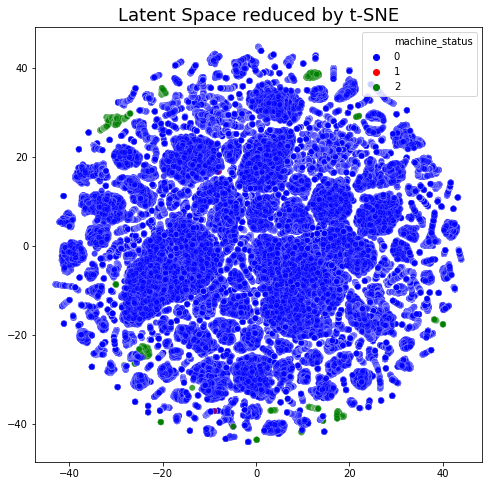

In [50]:
# Visualize results
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_tsne_reduced[:,0], 
                y=X_tsne_reduced[:,1], 
                hue=y.loc[X.index],
                palette=['blue', 'red', 'green'],
                linewidth=.2,
                alpha=0.5)
plt.title('Latent Space reduced by t-SNE', fontsize=18)
plt.show()

> **La distanza tra i cluster non è rispettata nel passaggio dallo spazio delle covariate originale a quello ridotto.** Cluster molto lontani in $\tilde{\mathcal{X}}$ non necessariamente sono lontani in $\mathcal{X}$.

## Clustering

Le tecniche di clustering si basano su misure relative alla somiglianza tra gli elementi. In molti approcci questa similarità, o meglio, dissimilarità, è concepita in termini di distanza in uno spazio multidimensionale. La bontà delle analisi ottenute dagli algoritmi di clustering dipende molto dalla scelta della metrica, e quindi da come è calcolata la distanza. Gli algoritmi di clustering raggruppano gli elementi sulla base della loro distanza reciproca, e quindi l'appartenenza o meno ad un insieme dipende da quanto l'elemento preso in esame è distante dall'insieme stesso.

Gli algoritmi di clustering possono essere suddivisi in due gruppi secondo la metodologia che utilizzano per dividere lo spazio:

*   **Clustering partizionale / k-clustering**, in cui per definire l'appartenenza di un punto ad un gruppo si utilizza la distanza tra questo e un punto rappresentativo del cluster (*centroide*, medioide, ecc...). Il numero di cluster è prefissato. 
*   **Clustering gerarchico**, in cui viene costruita una gerarchia di partizioni caratterizzate da un numero (de)crescente di gruppi, visualizzabile mediante una rappresentazione ad albero (dendrogramma), in cui sono rappresentati i passi di accorpamento/divisione dei gruppi.

### Metriche

Per confrontare le capacità di clustering di un algoritmo va considerata:


1.   la varianza residua interna alla partizione (**intra-cluster variance**)
2.   la varianza esterna al cluster (**outer-cluster variance**)



#### Silhouette Coefficient

Il coefficiente silhouette paragona la distanza media tra i punti interni al cluster e la distanza media tra i punti appartenenti alle altre partizioni. Punti con elevato **silhouette coefficient** sono stati ben clusterizzati; punti con un valore basso invece, potrebbero essere outliers. Il valore del coefficiente è compreso tra -1 e 1 e sintetizza quindi quanto simili sono i punti interni al cluster (**coesione**) rispetto agli altri cluster (**separazione**).

Questa metrica è molto efficace nel clustering partizionale ed è anche usata per determinare il numero ottimale di cluster.

Sia $\mathbf{x}_i$ un punto interno al cluster $P_\alpha$ (che comprende in totale $n_\alpha$ elementi).

Allora la distanza media intra-cluster può essere calcolata come
$$a(\mathbf{x}_i) = \frac{1}{n_\alpha-1} \sum_{\mathbf{x}_j \in P_\alpha ,\ j\ne i} ||\mathbf{x}_i - \mathbf{x}_j||^2$$
La **minima** distanza media con i punti appartenenti ad un altro cluster può essere invece scritta come
$$b(\mathbf{x}_i) = \min_{\beta \ne \alpha} \frac{1}{n_\beta-1} \sum_{\mathbf{x}_j \in P_\beta} ||\mathbf{x}_i - \mathbf{x}_j||^2$$

Il silhouette coefficient è dunque calcolato come
$$s(\mathbf{x}_i)={\frac {b(\mathbf{x}_i)-a(\mathbf{x}_i)}{\max\{a(\mathbf{x}_i),b(\mathbf{x}_i)\}}}$$ se $n_\alpha >1$ \
e posto 
$$s(\mathbf{x}_i)=0$$
se $n_\alpha = 1$.


In sintesi si può scrivere
$$s(\mathbf{x}_i) = \begin{cases}
  1-a(\mathbf{x}_i)/b(\mathbf{x}_i), & \mbox{se } a(\mathbf{x}_i) < b(\mathbf{x}_i) \\
  0,  & \mbox{se } a(\mathbf{x}_i) = b(\mathbf{x}_i) \\
  b(\mathbf{x}_i)/a(\mathbf{x}_i)-1, & \mbox{se } a(\mathbf{x}_i) > b(\mathbf{x}_i) \\
\end{cases}$$

Con questa definizione $s(\mathbf{x}_i)$ è quindi compreso tra $-1$ e $+1$ e molto vicino all'unità quando $a(\mathbf{x}_i) \ll b(\mathbf{x}_i)$.

![Silhouette Coefficient](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png)

In [0]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [0]:
def silhouette_graph(X, cluster_labels):
    n_clusters = len(np.unique(cluster_labels))

    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(figsize=(7, 7))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax.set_xlim([-1.0, 1.0])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, sample_size=min(1000, len(X)))
    print(f'For n_clusters = {n_clusters} the average silhouette_score is : {silhouette_avg:.4f}')

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(f"The silhouette plot for the {n_clusters} clusters")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

### k-Means

Sia $\mathcal{D} = \left\{\mathbf{x}_i\right\}_{i=1, \dots, N}$ lo spazio delle covariate osservato. \
Si fissa $k$ il numero di cluster da identificare in $\mathcal{D}$. Con cluster si intende una partizione $P$ di $\mathcal{D}$ tale che:
$$\bigcup_{i=1}^k P_i = \mathcal{D}$$
$$P_i \cap P_j = \varnothing \quad i \ne j$$
$$\varnothing \subset P_i \subset \mathcal{D} \quad \forall i=1, \dots, k$$

Siano $\mathbf{C}_1, \dots, \mathbf{C}_k$ i centroidi. L'appartenenza dei punti ai cluster può essere registrata tramite una matrice $U$ di dimensine $N \times k$ che ad ogni punto (una riga di $U$) ha componenti che valgono o $0$ (non appartiene al cluster) o $1$ (appartiene al cluster).\
Ad esempio, se $k=3$ e il punto $\mathbf{x}_1$ appartenesse al secondo cluster allora
$$U_{1\cdot} = (u_{11}, u_{12}, u_{13}) = (0, 1, 0)$$

L'obiettivo è quindi quello di minimizzare
$$\mathcal{R}(U, \mathbf{C}_1, \dots, \mathbf{C}_k) = \sum_{i=1}^{k} \sum_{\mathbf{x}_j \in P_i} ||x_{j}-\mathbf{C}_{i}||^{2}$$

> Nell'algoritmo k-means i centroidi sono calcolati come i punti di coordinate medie tra tutti quelli compresi nella rispettiva partizione $\mathbf{C}_1=\mathbf{\mu}_1, \dots, \mathbf{C}_k=\mathbf{\mu}_k$. \
Esistono anche altre varianti come l'algoritmo k-medians o k-medoids.

Per l'algoritmo k-means si vuole quindi ottenere:
$$(\hat{P}_1, \dots, \hat{P}_k) = \arg\min_{(P_1, \dots, P_k)} \sum_{i=1}^{k} \sum_{\mathbf{x}_j \in P_i} ||x_{j}-\mathbf{\mu}_{i}||^{2}$$

Indicando con $n_i$ il numero di elementi della partizione $P_i$, si può dimostrare che in tal modo si minimizza anche la varianza empirica interna al cluster
$$ \arg\min_{(P_1, \dots, P_k)} \sum_{i=1}^{k} \sum_{\mathbf{x}_j \in P_i} ||x_{j}-\mathbf{\mu}_{i}||^{2}=\arg\min_{(P_1, \dots, P_k)} \sum _{i=1}^{k} (n_i - 1) \hat{var}(P_{i})$$
poiché
$$\hat{var}(X) = \frac{1}{n-1} \sum_{i=1}^{n} ||x_{j}-\mathbf{\mu}_{i}||^{2}$$
è stimatore della varianza.

Si costruisce così un algoritmo iterativo:
![kmeans](https://www.researchgate.net/profile/Pei_Yuan_Zhou/publication/273063437/figure/fig2/AS:391964093632512@1470462930009/The-pseudo-code-for-K-means-clustering-algorithm.png)

![kmeans](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

![kmeans](https://www.developersmaggioli.it/wp-content/uploads/2019/06/k4XcapI.gif)

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=9, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

```
n_init : int, default: 10
Number of time the k-means algorithm will be run with different centroid seeds.
The final results will be the best output of n_init consecutive runs in terms of inertia.
```



In [55]:
# Coordinates of cluster centers
kmeans.cluster_centers_

array([[-5.12463074e+00, -8.86299171e-01, -2.45753480e+00,
        -1.63846457e+00, -4.82318552e+00, -3.67580983e+00,
        -2.81367540e+00, -1.49546974e+00, -1.23167537e+00,
        -1.08409481e+00, -4.27101371e+00, -3.91814537e+00,
        -3.46291200e+00, -8.66300805e-01,  3.52413739e-01,
         3.45310096e-01,  2.97040916e-01,  2.68741464e-01,
         3.49081165e-01,  3.48536515e-01,  3.41404653e-01,
         2.83371556e-01,  2.88791264e-01,  3.57042889e-01,
         2.93210050e-01,  2.97789185e-01,  5.42538458e-02,
         7.74272190e-01,  4.86741181e-01,  3.33373583e-01,
         4.11768969e-01,  2.97881518e-01,  4.49756875e-01,
        -2.65781208e-01, -5.12282267e-02, -1.86168967e-01,
         4.67883481e-01, -1.59235149e-01,  1.25817081e+00,
        -7.09371260e-01,  6.11175940e-01,  7.94478753e-01,
         2.21413870e-01, -1.53500414e-01, -1.43089901e-02,
        -4.16451016e-02, -1.81480519e-02, -1.32064621e+00,
        -5.80224629e-01, -2.20005592e+00],
       [ 1.01

In [56]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

3429750.8621197366

For n_clusters = 9 the average silhouette_score is : 0.2033


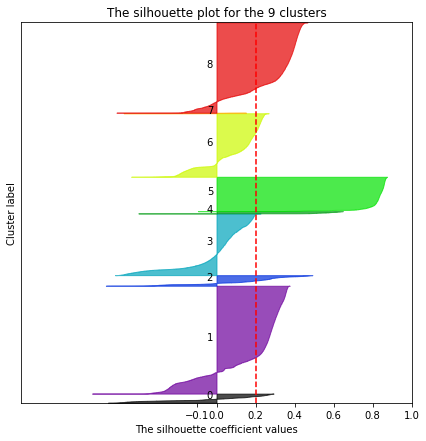

In [57]:
silhouette_graph(X, kmeans_clusters)

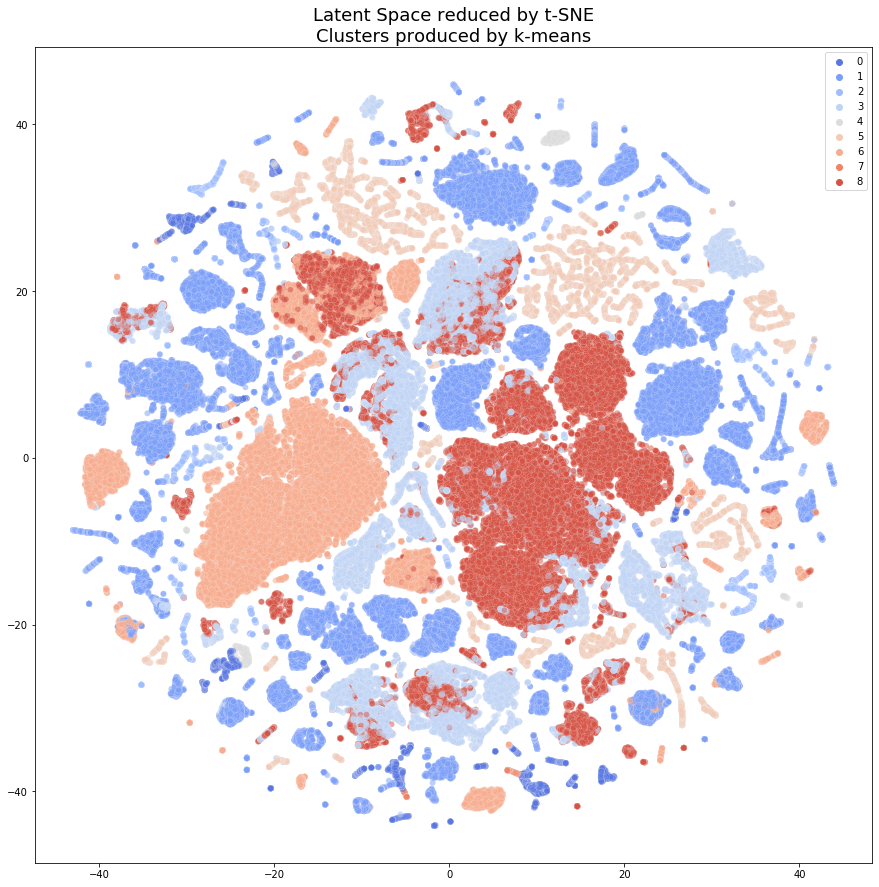

In [59]:
# Visualize results
plt.figure(figsize=(15, 15))
sns.scatterplot(x=X_tsne_reduced[:,0], 
                y=X_tsne_reduced[:,1], 
                hue=kmeans_clusters,
                linewidth=.2, 
                palette=sns.color_palette('coolwarm', n_colors=len(np.unique(kmeans_clusters))),
                alpha=0.5)
plt.title('Latent Space reduced by t-SNE\nClusters produced by k-means', fontsize=18)
plt.show()

### DBSCAN

Il DBSCAN (**Density-Based Spatial Clustering of Applications with Noise**) è un metodo di clustering gerarchico basato sulla densità dei punti nello spazio campionario. L'algoritmo connette infatti regioni di punti con densità sufficientemente alta (specificata tramite due parametri, $\varepsilon$ e $MinPts$).

![DBSCAN](https://miro.medium.com/max/5480/1*zbm_3K647rvNDmgL6HWUNQ.png)

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
%%time
# DBSCAN - Density-Based Spatial Clustering of Applications with Noise
dbscan = DBSCAN(eps=0.9, min_samples=20)
dbscan_clusters = dbscan.fit_predict(X_scaled)

In [0]:
# Visualize results
plt.figure(figsize=(15, 15))
sns.scatterplot(x=X_tsne_reduced[:,0], 
                y=X_tsne_reduced[:,1], 
                hue=dbscan_clusters,
                linewidth=.2, 
                palette=sns.color_palette('coolwarm', n_colors=len(np.unique(dbscan_clusters))),
                alpha=0.5)
plt.title('Latent Space reduced by t-SNE\nClusters produced by DBSCAN', fontsize=18)
plt.show()

## Esercizi


1.   Analizzare se esiste una ciclicità giornaliera nei valori assunti dalle diverse variabili.

2.   Sviluppare un algoritmo di interpolazione che permetta di completare i dati mancanti relativi al sensore 51.

3.   Utilizzare il silhouette coefficient per determinare il migliore numero di cluster da considerare nello sviluppo dell'algoritmo k-means.

## Fonti

> `"Python Data Science Handbook: Tools and Techniques for Developers"`, Jake VanderPlas

> `"Data Mining"`, Charu C. Aggarwal

> `"Outlier Analysis"`, Charu C. Aggarwal

> `"Pattern Recognition and Machine Learning"`, Christopher M. Bishop


# Completed Notebook

In [63]:
import datetime
print('Completed running this Notebook at:', datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Completed running this Notebook at: 2019-11-04 15:40:19
